### **Ejemplo inicial**

Este código interactivo permite aplicar una transformación lineal a varias figuras geométricas (un perro, un gato y un ratón) utilizando una matriz de transformación simbólica definida con la librería SymPy. El usuario puede ajustar los parámetros de la matriz de transformación (
𝑎,
𝑏,
𝑐,
𝑑) mediante controles deslizantes interactivos, lo que altera las figuras en tiempo real.

Las transformaciones se aplican a los puntos que definen las figuras y se visualizan con Matplotlib. El código genera gráficos de la figura original y de la figura transformada, superponiéndolas para mostrar los efectos de la transformación en los ejes
𝑋
 e
𝑌
. El usuario puede escoger entre las tres figuras (Perro, Gato, Ratón) y manipular la transformación (como rotación, escalamiento, o distorsión) ajustando los valores de la matriz, lo que ofrece una manera visual y práctica de entender cómo las matrices afectan las figuras en el plano cartesiano.

In [8]:
import matplotlib.pyplot as plt
from sympy import symbols, Matrix
from matplotlib.patches import Polygon
from ipywidgets import interact, FloatSlider, Dropdown

# Definir las figuras geométricas (Perro, Gato, Ratón)
shapes = {
    "Perro": [[0, 0], [3, 0], [3, 1], [4, 1], [4, 2], [3, 2], [3, 3], [2, 2], [0, 2], [0, 0]],
    "Gato": [[0, 0], [3, 0], [3, 2], [4, 3], [4, 4], [3, 5], [3, 4], [2, 4], [2, 5], [1, 4],
             [1, 3], [2, 2], [0, 2], [0, 0]],
    "Raton": [[0, 0], [2, 0], [2, 2], [3, 2], [3, 3], [3.5, 3], [3.5, 3.5], [3, 3.5], [3, 3],
              [2, 3], [2, 3.5], [1.5, 3.5], [1.5, 3], [2, 3], [2, 2], [0, 2], [0, 0]]
}

# Definir variables simbólicas
a, b, c, d = symbols('a b c d')

# Matriz de transformación simbólica
def transformation_matrix(a, b, c, d):
    return Matrix([[a, b], [c, d]])

# Función para graficar la figura con la transformación aplicada
def plot_transformed(shape_name, a_val=1, b_val=0, c_val=0, d_val=1):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Elegir la figura
    original_shape = shapes[shape_name]

    # Crear la matriz de transformación simbólica
    matrix = transformation_matrix(a, b, c, d)

    # Aplicar la transformación simbólicamente a cada punto
    transformed_shape = []
    for point in original_shape:
        vector = Matrix(point)  # Convertir el punto en vector columna
        transformed_point = matrix * vector  # Aplicar la transformación
        transformed_shape.append([transformed_point[0].evalf(subs={a: a_val, b: b_val, c: c_val, d: d_val}),
                                  transformed_point[1].evalf(subs={a: a_val, b: b_val, c: c_val, d: d_val})])

    # Graficar la figura original y la transformada
    polygon_original = Polygon(original_shape, closed=True, fill=None, edgecolor='blue', linestyle='--', linewidth=2, label="Original")
    polygon_transformed = Polygon(transformed_shape, closed=True, fill=None, edgecolor='red', linewidth=2, label="Transformada")

    ax.add_patch(polygon_original)
    ax.add_patch(polygon_transformed)

    # Configuración de los ejes
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal', 'box')

    # Agregar ejes X e Y con líneas más visibles
    ax.axhline(0, color='black', linewidth=1.5)
    ax.axvline(0, color='black', linewidth=1.5)

    # Etiquetas de los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')

    # Habilitar la cuadrícula
    ax.grid(True)

    # Agregar leyenda
    plt.legend()
    plt.show()

# Crear los sliders para los parámetros de la matriz y el dropdown para elegir la figura
interact(
    plot_transformed,
    shape_name=Dropdown(options=['Perro', 'Gato', 'Raton'], value='Perro', description='Elegir'),
    a_val=FloatSlider(min=-3, max=3, step=0.25, value=1, description='a'),
    b_val=FloatSlider(min=-3, max=3, step=0.25, value=0, description='b'),
    c_val=FloatSlider(min=-3, max=3, step=0.25, value=0, description='c'),
    d_val=FloatSlider(min=-3, max=3, step=0.25, value=1, description='d')
)

interactive(children=(Dropdown(description='Elegir', options=('Perro', 'Gato', 'Raton'), value='Perro'), Float…

<function __main__.plot_transformed(shape_name, a_val=1, b_val=0, c_val=0, d_val=1)>

En el siguiente código tenemos un ejemplo de una transformación de rotación aplicada a un polígono. La transformación se realiza utilizando una matriz de rotación, que rota los vértices del polígono por un ángulo especificado por el usuario. Este ángulo se controla de manera interactiva mediante un deslizador, lo que permite observar en tiempo real cómo cambia la posición del polígono en el plano conforme varía el ángulo.

La matriz de rotación en 2D está definida como:

$$
R(\theta) = \begin{pmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{pmatrix}
$$
donde
𝜃
 es el ángulo de rotación en radianes. Este valor se convierte de grados a radianes para realizar la rotación correctamente. Al aplicar esta matriz de rotación a cada uno de los vértices del polígono, se obtiene una nueva posición para cada vértice, generando así la versión rotada del polígono original.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from ipywidgets import interact, FloatSlider, Checkbox
from matplotlib import patches

# Función para la transformación afín de rotación
def rotate_polygon(pts, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad),  np.cos(angle_rad)]])
    return np.dot(pts, rotation_matrix.T)

# Función para graficar el polígono original y el rotado
def plot_polygons(angle=90, showorigpolygon=True, shownewpolygon=True, showarc=True, showgrid=True):
    # Definir los puntos del polígono original
    pts = np.array([[4, 0], [8, 0], [8, 4], [4, 4]])

    # Rotar el polígono
    rotated_pts = rotate_polygon(pts, angle)

    # Crear la figura
    fig, ax = plt.subplots(figsize=(6, 6))

    # Mostrar el polígono original
    if showorigpolygon:
        original_polygon = Polygon(pts, closed=True, fill=True, edgecolor='blue', facecolor='orange', alpha=0.7)
        ax.add_patch(original_polygon)

    # Mostrar el polígono rotado
    if shownewpolygon:
        rotated_polygon = Polygon(rotated_pts, closed=True, fill=True, edgecolor='red', facecolor='purple', alpha=0.7)
        ax.add_patch(rotated_polygon)

    # Mostrar el arco de rotación
    if showarc:
        for i in range(len(pts)):
            # Arcos de los vectores
            arc = patches.Arc([0, 0], width=2*np.linalg.norm(pts[i]), height=2*np.linalg.norm(pts[i]),
                              angle=0, theta1=0, theta2=angle, edgecolor='black', linestyle='dashed', lw=1.5)
            ax.add_patch(arc)

    # Configurar los ejes y la cuadrícula
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal', 'box')

    if showgrid:
        ax.grid(True)
        ax.set_xticks(np.arange(-10, 11, 2))
        ax.set_yticks(np.arange(-10, 11, 2))

    # Dibujar ejes X e Y
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)

    plt.show()

# Crear los widgets interactivos
interact(plot_polygons,
         angle=FloatSlider(min=0, max=360, step=1, value=0, description='Ángulo de rotación (grados)'),
         showorigpolygon=Checkbox(value=True, description="Mostrar polígono original"),
         shownewpolygon=Checkbox(value=True, description="Mostrar polígono rotado"),
         showarc=Checkbox(value=True, description="Mostrar arco de rotación"),
         showgrid=Checkbox(value=True, description="Mostrar ejes"))


interactive(children=(FloatSlider(value=0.0, description='Ángulo de rotación (grados)', max=360.0, step=1.0), …

<function __main__.plot_polygons(angle=90, showorigpolygon=True, shownewpolygon=True, showarc=True, showgrid=True)>

### **Ejemplo 1**

Supongamos que tenemos un triángulo con vértices $(0, 0)$, $(1, 0)$ y $(0.5, 1)$. Nuestro objetivo es rotar este triángulo por un ángulo de $45^\circ$. Para lograrlo, seguiremos estos pasos:



1.   Definimos la matriz de rotación utilizando **SymPy**.
2.   Aplicamos la matriz de rotación a cada vértice del triángulo.
3.Graficamos el triángulo antes y después de la rotación para visualizar el efecto de la transformación.


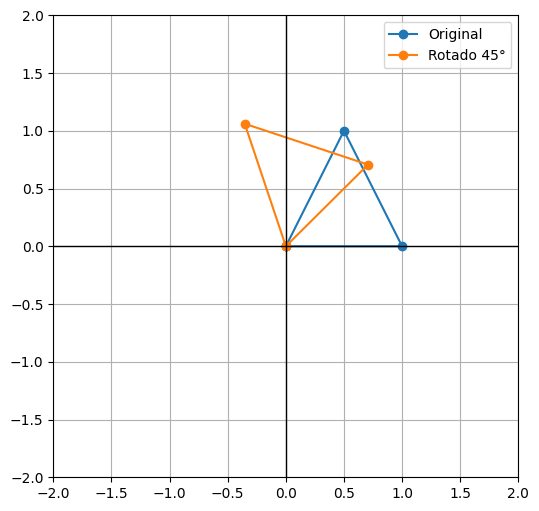

In [6]:
import matplotlib.pyplot as plt
import sympy as sp

# Definir el ángulo de rotación (45 grados convertido a radianes)
theta = sp.pi / 4

# Definir la matriz de rotación usando SymPy
R = sp.Matrix([[sp.cos(theta), -sp.sin(theta)],
               [sp.sin(theta), sp.cos(theta)]])

# Definir los vértices del triángulo original como una matriz 2xN
triangle = sp.Matrix([[0, 1, 0.5],  # Coordenadas x
                      [0, 0, 1]])   # Coordenadas y

# Aplicar la rotación a todos los puntos simultáneamente usando multiplicación matricial
rotated_triangle = R * triangle

# Evaluar numéricamente los puntos rotados
rotated_triangle_eval = rotated_triangle.evalf()

# Extraer las coordenadas de los vértices rotados para graficar
x_rotated = [rotated_triangle_eval[0, i] for i in range(rotated_triangle.shape[1])]
y_rotated = [rotated_triangle_eval[1, i] for i in range(rotated_triangle.shape[1])]

# Extraer las coordenadas del triángulo original
x_original = [triangle[0, i] for i in range(triangle.shape[1])]
y_original = [triangle[1, i] for i in range(triangle.shape[1])]

# Graficar el triángulo original y el rotado
plt.figure(figsize=(6,6))
plt.plot(x_original + [x_original[0]], y_original + [y_original[0]], '-o', label="Original")
plt.plot(x_rotated + [x_rotated[0]], y_rotated + [y_rotated[0]], '-o', label="Rotado 45°")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


### **Explicación:**

Matriz de Rotación: Definimos la matriz de rotación
𝑅
 en SymPy utilizando
𝜃
=
4
5
∘
θ=45
∘
 .

Matriz del Triángulo: Los vértices del triángulo se organizan en una matriz
2
×
3
, donde cada columna corresponde a un vértice (las primeras filas representan las coordenadas
𝑥
 y las segundas filas las coordenadas
𝑦
).

Transformación mediante Multiplicación Matricial: Aplicamos la rotación a todos los vértices simultáneamente usando la multiplicación matricial de SymPy, lo que transforma todas las coordenadas de los vértices.

Evaluación Numérica: El resultado de la rotación es evaluado numéricamente usando .evalf() para obtener los valores numéricos de las nuevas coordenadas.

Visualización: Utilizamos Matplotlib para graficar tanto el triángulo original como el rotado.

Este código elimina el uso de bucles y aplica la transformación directamente a los vértices en una única operación matricial, utilizando únicamente SymPy.

### **Ejemplo 2**

Ahora, vamos a escalar el mismo triángulo. Queremos estirarlo en el eje $x$ con un factor de $s_x = 2$ y comprimirlo en el eje $y$ con un factor de $s_y = 0.5$.

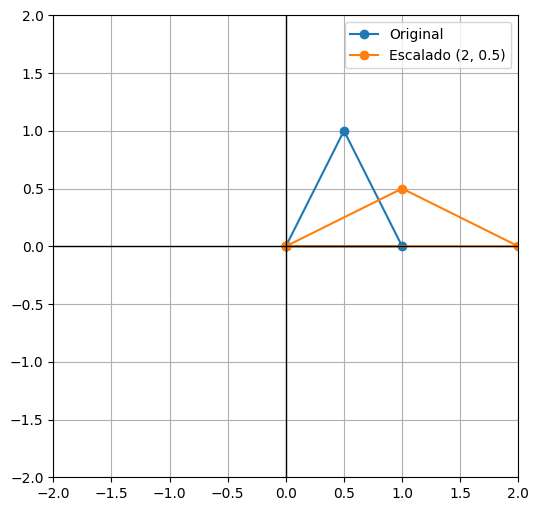

In [7]:
import matplotlib.pyplot as plt
import sympy as sp

# Definir la matriz de escalamiento usando SymPy
S = sp.Matrix([[2, 0],
               [0, 0.5]])

# Definir los vértices del triángulo original como una matriz 2xN
triangle = sp.Matrix([[0, 1, 0.5],  # Coordenadas x
                      [0, 0, 1]])   # Coordenadas y

# Aplicar el escalamiento a todos los puntos simultáneamente usando multiplicación matricial
scaled_triangle = S * triangle

# Evaluar numéricamente los puntos escalados
scaled_triangle_eval = scaled_triangle.evalf()

# Extraer las coordenadas de los vértices escalados para graficar
x_scaled = [scaled_triangle_eval[0, i] for i in range(scaled_triangle.shape[1])]
y_scaled = [scaled_triangle_eval[1, i] for i in range(scaled_triangle.shape[1])]

# Extraer las coordenadas del triángulo original
x_original = [triangle[0, i] for i in range(triangle.shape[1])]
y_original = [triangle[1, i] for i in range(triangle.shape[1])]

# Graficar el triángulo original y el escalado
plt.figure(figsize=(6,6))
plt.plot(x_original + [x_original[0]], y_original + [y_original[0]], '-o', label="Original")
plt.plot(x_scaled + [x_scaled[0]], y_scaled + [y_scaled[0]], '-o', label="Escalado (2, 0.5)")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


### **Explicación:**

Matriz de Escalamiento: Definimos la matriz de escalamiento
𝑆
 en SymPy, con un factor de escalamiento de 2 en el eje
𝑥
 y un factor de 0.5 en el eje
𝑦
.

Matriz del Triángulo: Los vértices del triángulo se organizan en una matriz
2
×
3
2×3, donde cada columna representa un vértice.

Transformación mediante Multiplicación Matricial: Aplicamos el escalamiento a todos los vértices simultáneamente utilizando la multiplicación matricial de SymPy.

Evaluación Numérica: El resultado de la transformación se evalúa numéricamente con .evalf() para obtener los valores de las coordenadas escaladas.

Visualización: Utilizamos Matplotlib para graficar tanto el triángulo original como el triángulo escalado.


### **Ejemplo 3**

Finalmente, reflejaremos el triángulo respecto al eje $x$. Para ello, usamos la siguiente matriz de reflexión:

$$Reflexión_x = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

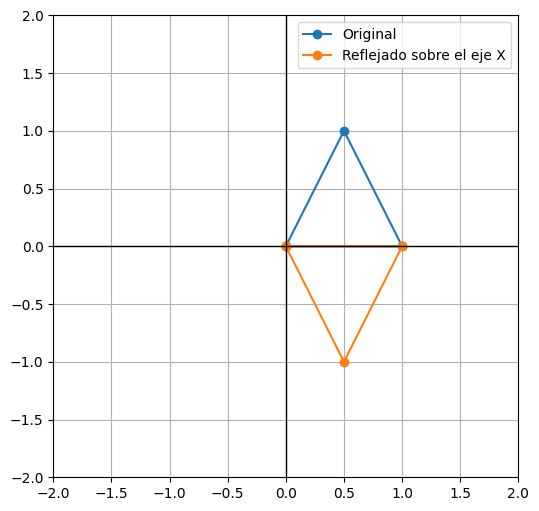

In [9]:
import matplotlib.pyplot as plt
import sympy as sp

# Definir la matriz de reflexión usando SymPy
F_x = sp.Matrix([[1, 0],
                 [0, -1]])

# Definir los vértices del triángulo original como una matriz 2xN
triangle = sp.Matrix([[0, 1, 0.5],  # Coordenadas x
                      [0, 0, 1]])   # Coordenadas y

# Aplicar la reflexión a todos los puntos simultáneamente usando multiplicación matricial
reflected_triangle = F_x * triangle

# Evaluar numéricamente los puntos reflejados
reflected_triangle_eval = reflected_triangle.evalf()

# Extraer las coordenadas de los vértices reflejados
x_reflected = reflected_triangle_eval.row(0)
y_reflected = reflected_triangle_eval.row(1)

# Extraer las coordenadas del triángulo original
x_original = triangle.row(0)
y_original = triangle.row(1)

# Graficar el triángulo original y el reflejado
plt.figure(figsize=(6,6))
plt.plot([x_original[0], x_original[1], x_original[2], x_original[0]],
         [y_original[0], y_original[1], y_original[2], y_original[0]], '-o', label="Original")
plt.plot([x_reflected[0], x_reflected[1], x_reflected[2], x_reflected[0]],
         [y_reflected[0], y_reflected[1], y_reflected[2], y_reflected[0]], '-o', label="Reflejado sobre el eje X")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


Explicación:

Multiplicación Matricial: La matriz de reflexión
𝐹
𝑥
​
  se aplica directamente a la matriz de vértices triangle mediante multiplicación matricial, eliminando la necesidad de usar bucles for.

Evaluación Numérica: El resultado de la multiplicación se evalúa numéricamente utilizando .evalf() de SymPy.

Extracción de Coordenadas: Las coordenadas
𝑥
 e
𝑦
 de los vértices reflejados se extraen directamente con los métodos row(0) y row(1) de SymPy.

Visualización: Se grafican tanto el triángulo original como el reflejado usando Matplotlib. Las coordenadas de ambos triángulos se conectan para formar las figuras geométricas.